# RGBD图像

open3d针对图像提出了一种数据结构，支持read_image, write_image, filter_image, draw_geometries等函数。并且由open3d打开的图像可以直接转换成numpy数组。

RGBD指的是一种包含颜色(RGB)和深度(Depth)信息的图像或数据格式，在open3d中，RGBDImage.depth 和 RGBDImage.color可分别读取深度图像和rgb图像，

# 读取不同RGBD图像数据集

In [2]:
import open3d as o3d
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# 设置字体，以便在图像中显示中文
from pylab import mpl
 
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [6]:
# 使用read_image函数读取分别读取rgb图像和深度图像
color_raw = o3d.io.read_image(r'G:\open3d\data\SampleRedwoodRGBDImages\color\00000.jpg')
depth_raw = o3d.io.read_image(r'G:\open3d\data\SampleRedwoodRGBDImages\depth\00000.png')

# create_from_color_and_depth函数用于将rgb图像和深度图像组合成RGBD图像
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)

# 显示RGBD图像的相关信息
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


注意：RGB图像会被转换成灰度图像，值在0和1之间，深度图像以米表示深度单位

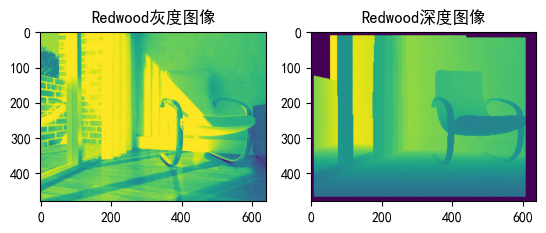

In [9]:
plt.subplot(1, 2, 1)
plt.title('Redwood灰度图像')
plt.imshow(rgbd_image.color)


plt.subplot(1, 2, 2)
plt.title('Redwood深度图像')
plt.imshow(rgbd_image.depth)
plt.show()

如果有相机的参数信息，可以将RGBD图像转换成点云

In [11]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)) # 设置相机的参数，这里使用内置的PrimeSenseDefault参数

# 将点云进行翻转，不然点云位置可能会颠倒
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

点云如下图所示  
  
  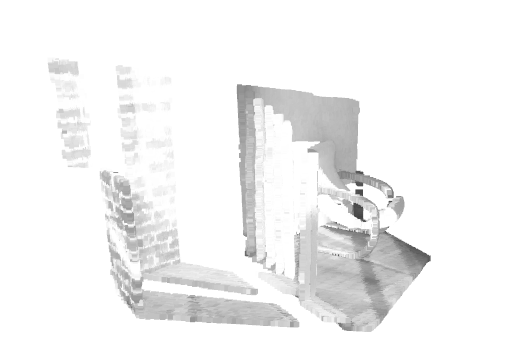